# Final Report

## Introduction
The dataset contains 32 columns. Each column corresponds to a specific attribute for each participant. The values in all columns were originally categorical but have been quantified to real numbers in the dataset. The level of consumption, however, for each drug is categorical and contains the following classes:

- CLO: Never used
- CL1: Used over a decade ago
- CL2: Used in last decade
- CL3: Used in last year
- CL4: Used in last month
- CL5: Used in last week
- CL6: Used in last day

Among all the legal and illegal drugs in the dataset, there is a fictitious drug called Semeron which was used in the survey to identify over-claimers. Here is information regarding all the columns:

- ID 
- Age (18 to 65+)
- Gender
- Education (level of education)
- Country (country of residence)
- Ethnicity (ethnicity)
- Nscore (measurement of neuroticism)
    + 12 to 60 (actual)
    + -3.46436 to 3.27393 (quantified)
- Escore (measurement of extraversion) 
    + 16 to 59 (actual)
    + -3.27393 to 3.27393 (quantified)
- Oscore (openness to experience)
    + 24 to 60 (actual)
    + -3.27393 to 2.90161 (quantified)
- Ascore (measurement of agreeableness)
    + 12 to 60 (actual)
    + -3.46436 to 3.46436 (quantified)
- Cscore (measurement of conscientiousness)
    + 17 to 59 (actual)
    + -3.46436 to 3.46436 (quantified)
- IScore (measurement of impulsiveness)
    + no actual values were provided
    + -2.55524 to 2.90161 (quantified)
- SS (measurement of sensation seeking)
    + no actual values were provided
    + -2.07848 to 1.92173 (quantified)
- Alcohol (level alcohol consumption)
- Amphet (level of amphetamines consumption)
- Amyl (level of amyl nitrite consumption)
- Benzos (level of benzodiazepine consumption)
- Caff (level of caffeine consumption)
- Cannabis (level of cannabis consumption)
- Choc (level of chocolate consumption)
- Coke (level of cocaine consumption)
- Crack (level of crack consumption)
- Ecstasy(level of ecstasy consumption)
- Heroin (level of heroin consumption)
- Ketamine (level of ketamine consumption)
- Legalh (level of legal highs consumption) 
- LSD is (level of LSD consumption)
- Meth (level of methadone consumption) 
- Mushrooms (level of magic mushrooms consumption) 
- Nicotine (level of nicotine consumption)
- Semer (level of fictitious drug Semeron consumption) 
- VSA (level of volatile substance abuse) 

## Methods and Results
### Loading Libraries

In [1]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(GGally)
library(forcats)
library(RColorBrewer)
library(ggplot2)
library(knitr)
options(repr.matrix.max.rows = 7) # limits the outputs of data frames to 7 rows (or observations)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0  

### Reading the Data
We will read the drugs consumption quantified dataset directly from the URL and save it to a dataframe called "drugs_data". Since the columns in the dataset have no headings, we will set `col_names` to `FALSE`.

In [2]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data"
drugs_data <- read_csv(url, col_names = FALSE)
drugs_data

Rows: 1885 Columns: 32
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (19): X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X...
dbl (13): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,⋯,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,⋯,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,⋯,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,⋯,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,⋯,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,⋯,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0
1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,⋯,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6,CL0,CL2


### Wrangling and Cleaning
- We do not need to check for any missing values in the dataset as it is mentioned in the website that there are not any.
- We will rename the column headings to suitable names according to the website's column order under "Attribute Information".
- Each row in the data set corresponds to a single participant (observation), each column to a single variable (attribute) and each cell to a single value. Thus, our dataset is in tidy format.
- We will select only the columns that give us information about the participant's age, personality measurements, level of alcohol and semeron consumption as these are the only variables from the dataset that we will be needing for our planned analysis.
- Since there are observations where the consumption for the fictitious drug `Semeron` is not `CLO` (never used), we will filter out these observations as they are not useful and then remove this column as well.
- We will use `mutate` and `as_factor` functions to ensure that our response variable `Alcohol` is treated as factor which is neccesary for our classficiation model.

In [3]:
colnames(drugs_data) <- c("ID", "Age", "Gender", "Education", "Country", "Ethnicity", "NScore", "EScore", "OScore", "AScore", 
                          "CScore", "IScore", "SS", "Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke",
                          "Crack", "Ecstacy", "Heroin", "LegalH", "LSD", "Meth", "Mushrooms", "Nicotine", "Semeron", "VSA")

alcohol_data <- select(drugs_data, Age, NScore , EScore, OScore, AScore,
                                IScore, CScore, SS, Semeron, Alcohol)

alcohol_data_filtered <- alcohol_data |>
                         filter(Semeron == "CL0") |>
                         select(-Semeron)

alcohol_clean <- alcohol_data_filtered |>
                 mutate(Alcohol = as_factor(Alcohol))
alcohol_clean

Age,NScore,EScore,OScore,AScore,IScore,CScore,SS,Alcohol
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.49788,-0.46725,0.80523,-0.84732,-1.62090,-1.37983,-1.01450,0.40148,CL6
0.49788,-1.32828,1.93886,-0.84732,-0.30172,0.19268,1.63088,-0.52593,CL5
1.82213,-2.05048,-1.50796,-1.55521,-1.07533,-0.71126,1.13407,-0.52593,CL5
1.82213,1.37297,-0.15487,-0.17779,-1.92595,-0.71126,-1.51840,-0.21575,CL6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
-0.95197,-0.79151,0.00332,2.44904,0.76096,0.88113,-1.51840,1.92173,CL5
2.59171,2.12700,-0.15487,2.44904,0.94156,-0.21712,-0.65253,0.07987,CL5
-0.95197,-1.19430,1.74091,1.88511,0.76096,0.88113,-1.13788,1.92173,CL5


### Exploratory Data analysis
After cleaning our dataset, we are left with 428 observations. From this point on, we will be using 75% of our data set and we will use the rest 25% only to test the accuracy of our classifier. Thus, we will split our dataset into training and testing sets using the `initial_split` function.

In [4]:
set.seed(69)
alcohol_split <- initial_split(alcohol_clean, prop = 0.75, strata = Alcohol)
alcohol_train <- training(alcohol_split)
alcohol_test <- testing(alcohol_split)

#### Summary of the dataset
We will summarize our dataset in two ways:
- A table that reports the number of observations for each class in `Alcohol`
- A table that reports the mean of all personality measurements grouped by the `Alcohol` variable.

In [5]:
alcohol_count <- group_by(alcohol_train, Alcohol) |>
                 summarize(n = n())
alcohol_count

Alcohol,n
<fct>,<int>
CL6,66
CL5,137
CL4,48
CL0,16
CL3,35
CL1,6
CL2,11


- With the use `group_by`, `summarize` and `n()` functions, we obtained the count of observations for each class in `Alcohol` in the above table.
- The number of observations are distributed unevenly across all levels of alcohol consumption which means that our data set is not balanced. The maximum number of observations are in `CL5`(used in last week) while the mininum number of observations are in `CL1`(used over a decade ago). 

In [6]:
alcohol_means <- alcohol_train |>
                 group_by(Alcohol) |>
                 summarize(NScore_Mean = mean(NScore),
                           EScore_Mean = mean(EScore),
                           OScore_Mean = mean(OScore),
                           AScore_Mean = mean(AScore),
                           IScore_Mean = mean(IScore),
                           CScore_Mean = mean(CScore))
alcohol_means

Alcohol,NScore_Mean,EScore_Mean,OScore_Mean,AScore_Mean,IScore_Mean,CScore_Mean
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CL6,-0.1070455,0.0003836364,-0.2337532,0.20108061,-0.2593374,0.33426621
CL5,-0.2104826,0.1737224088,-0.3266285,0.33174526,-0.3653848,0.39946504
CL4,-0.2381323,-0.0304225000,-0.3216004,0.37365021,-0.2580952,0.35648354
CL0,0.1190381,0.1158106250,0.0469375,0.02410312,-0.3413656,0.23926312
CL3,-0.2083551,-0.1460434286,-0.4620551,-0.05292543,-0.4505683,-0.13884057
CL1,-0.5894517,0.4553266667,-0.9030767,0.75377667,-0.2583617,1.11948667
CL2,0.5474755,-0.5713127273,-0.6111855,-0.25231273,-0.4266245,0.02889545


- With the use of `group_by`, `summarize` and `mean()` functions, we were able to obtain the means of all potential predictor variables for each class in `Alcohol` in the above table.
- There is no clear distinction in these values between the classes in `Alcohol`. However, there is a pattern in the means for impulsivity as `IScore_Mean` suggests that the means for `IScore` across all classes is very close to its minimum value.

#### Visual representation of the dataset
- We will look at the distribution of all the potential predictors in the dataset using histograms since we are dealing with numerical data.
- After the analysis of the histograms, we will choose the variables which show a clear pattern in their distribution plots and 
perform further analysis on them separately.
- First, we need to modify our data so we can compare the distributions of all potential predictors next to each other using `facet_wrap`. For this purpose, we will use the `pivot_longer` function so that all the potential predictors are under one column `predictors` and their corresponding values are under the column `values`.

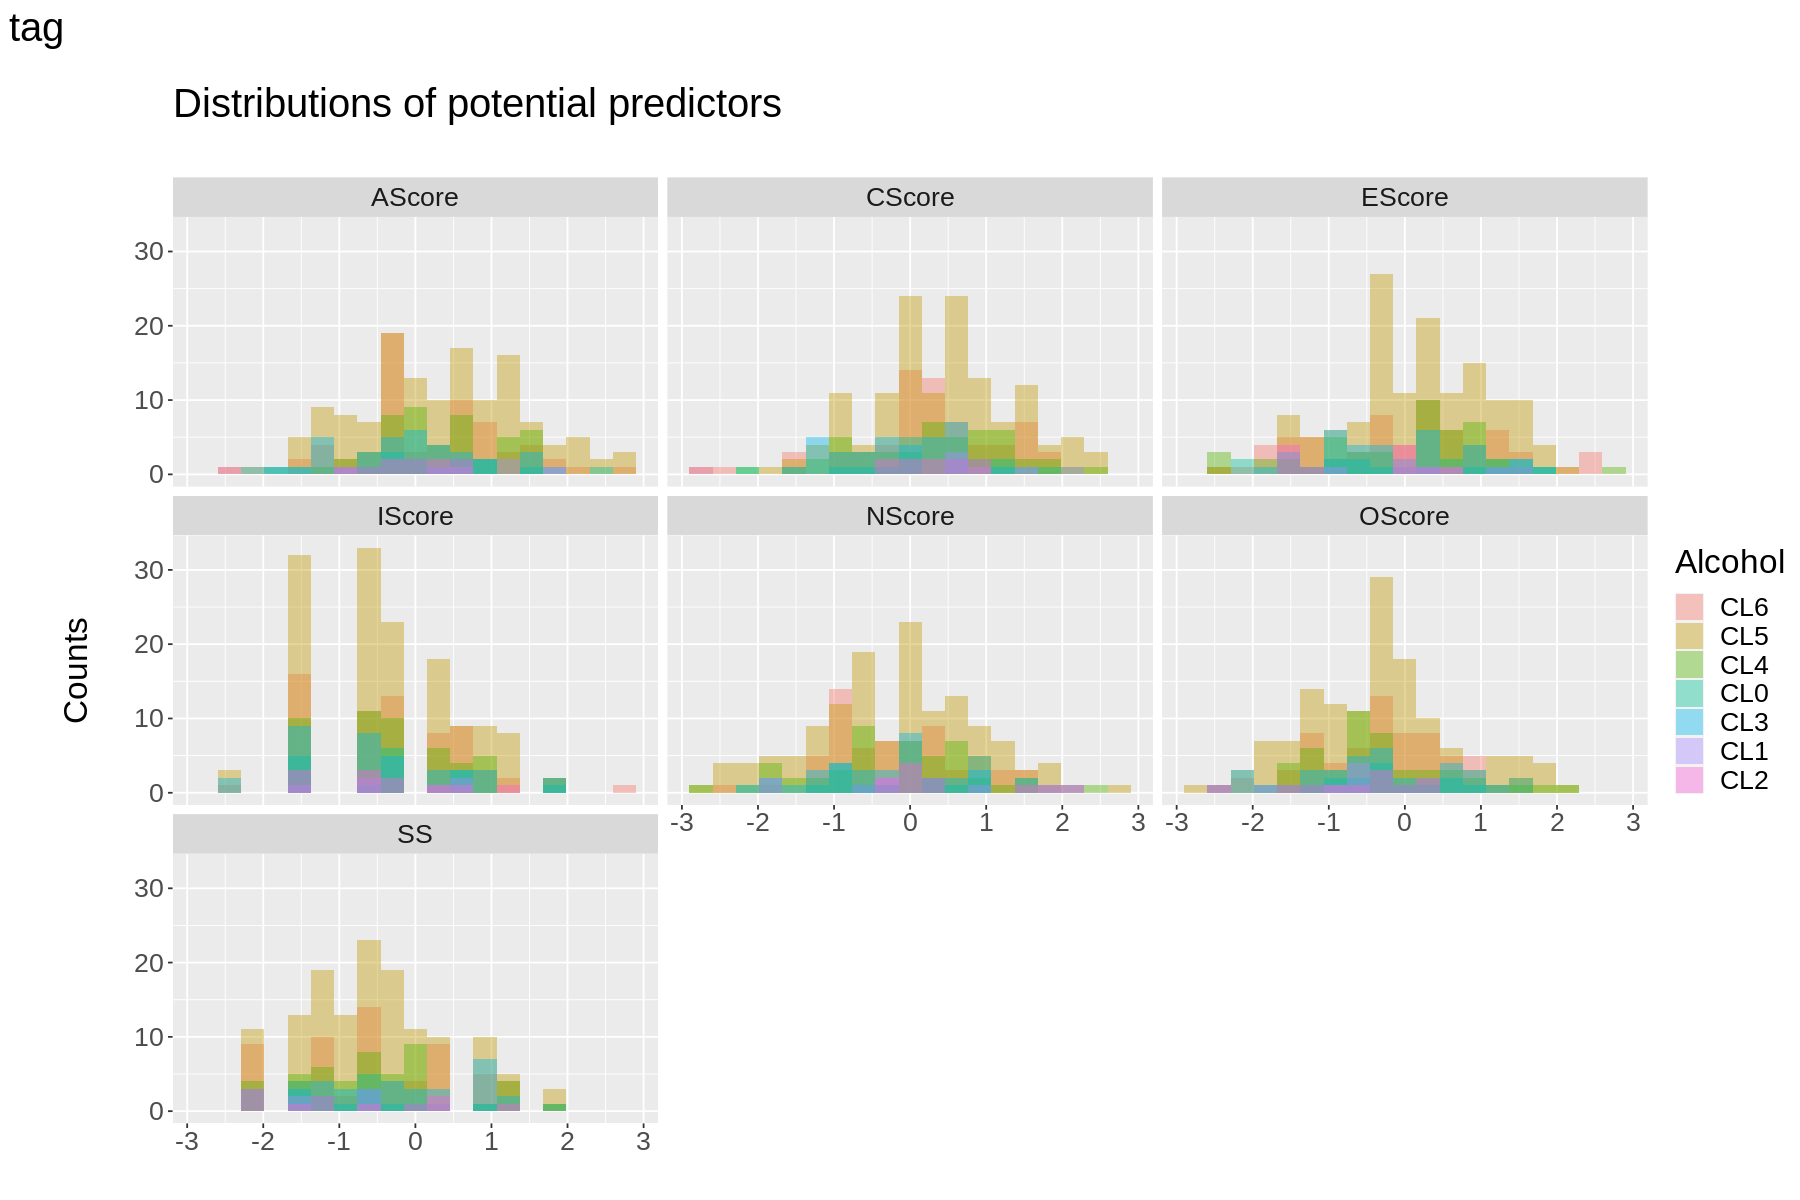

In [7]:
options(repr.plot.width = 15, repr.plot.height = 10)

alcohol_longer <- alcohol_train |> 
                pivot_longer(cols = NScore:SS,
                             names_to = "Potential_predictors",
                             values_to = "Values")

alcohol_plot <- alcohol_longer |>
    ggplot(aes(x = Values, fill = Alcohol, tag = "Figure")) + 
    geom_histogram(position = 'identity', bins = 20, alpha = 0.4) +
    labs(x = "",
         y = "Counts\n",
         title = "\nDistributions of potential predictors\n") +
    facet_wrap(vars(Potential_predictors)) +
    theme(text = element_text(size = 20)) 
alcohol_plot

- Looking at the plots above, 
......

## Building k-nn classifier
- We now perform K-NN classification with the chosen predictors on our dataset.
<!-- - To build our classification model, we use  the training set, `alcohol_train` and test it on the testing set`alcohol_test`. -->
- We first define our predictors and our target variable using the `recipe()` function. Scaling and centering are implemented within the recipe as well.
- To build our model for classification, we use the `nearest_neighbor()` function and set `neighbors = tune()` to the k-value with the highest accuracy.
- We will perform 5-fold cross-validation and then create a workflow where we combine the recipe, the model and apply the `tune_grid()` function for the cross validation. 
- We will use `collect_metrics()` function to collect the accuracy for each value of k and then plot them against the neighbors to visually identify the most optimal k-value.

In [8]:
set.seed(6699)

alcohol_recipe <- recipe(Alcohol ~ IScore + SS + EScore, data = alcohol_train) |>
                  step_scale(all_predictors()) |> 
                  step_center(all_predictors())

alcohol_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
    set_engine("kknn") |> 
    set_mode("classification")

alcohol_vfold <- vfold_cv(alcohol_train, v = 5, strata = Alcohol)

# testing k-values ranging from 1 to 50
gridvals <- tibble(neighbors = seq(1, 50))

alcohol_results <- workflow() |> 
    add_recipe(alcohol_recipe) |> 
    add_model(alcohol_spec) |> 
    tune_grid(resamples = alcohol_vfold, grid = gridvals) |> 
    collect_metrics() |> 
    filter(.metric == "accuracy")

! Fold2: internal:
  No observations were detected in `truth` for level(s): 'CL1'
  Computation will proceed by ignoring those levels.

! Fold3: internal:
  No observations were detected in `truth` for level(s): 'CL2'
  Computation will proceed by ignoring those levels.



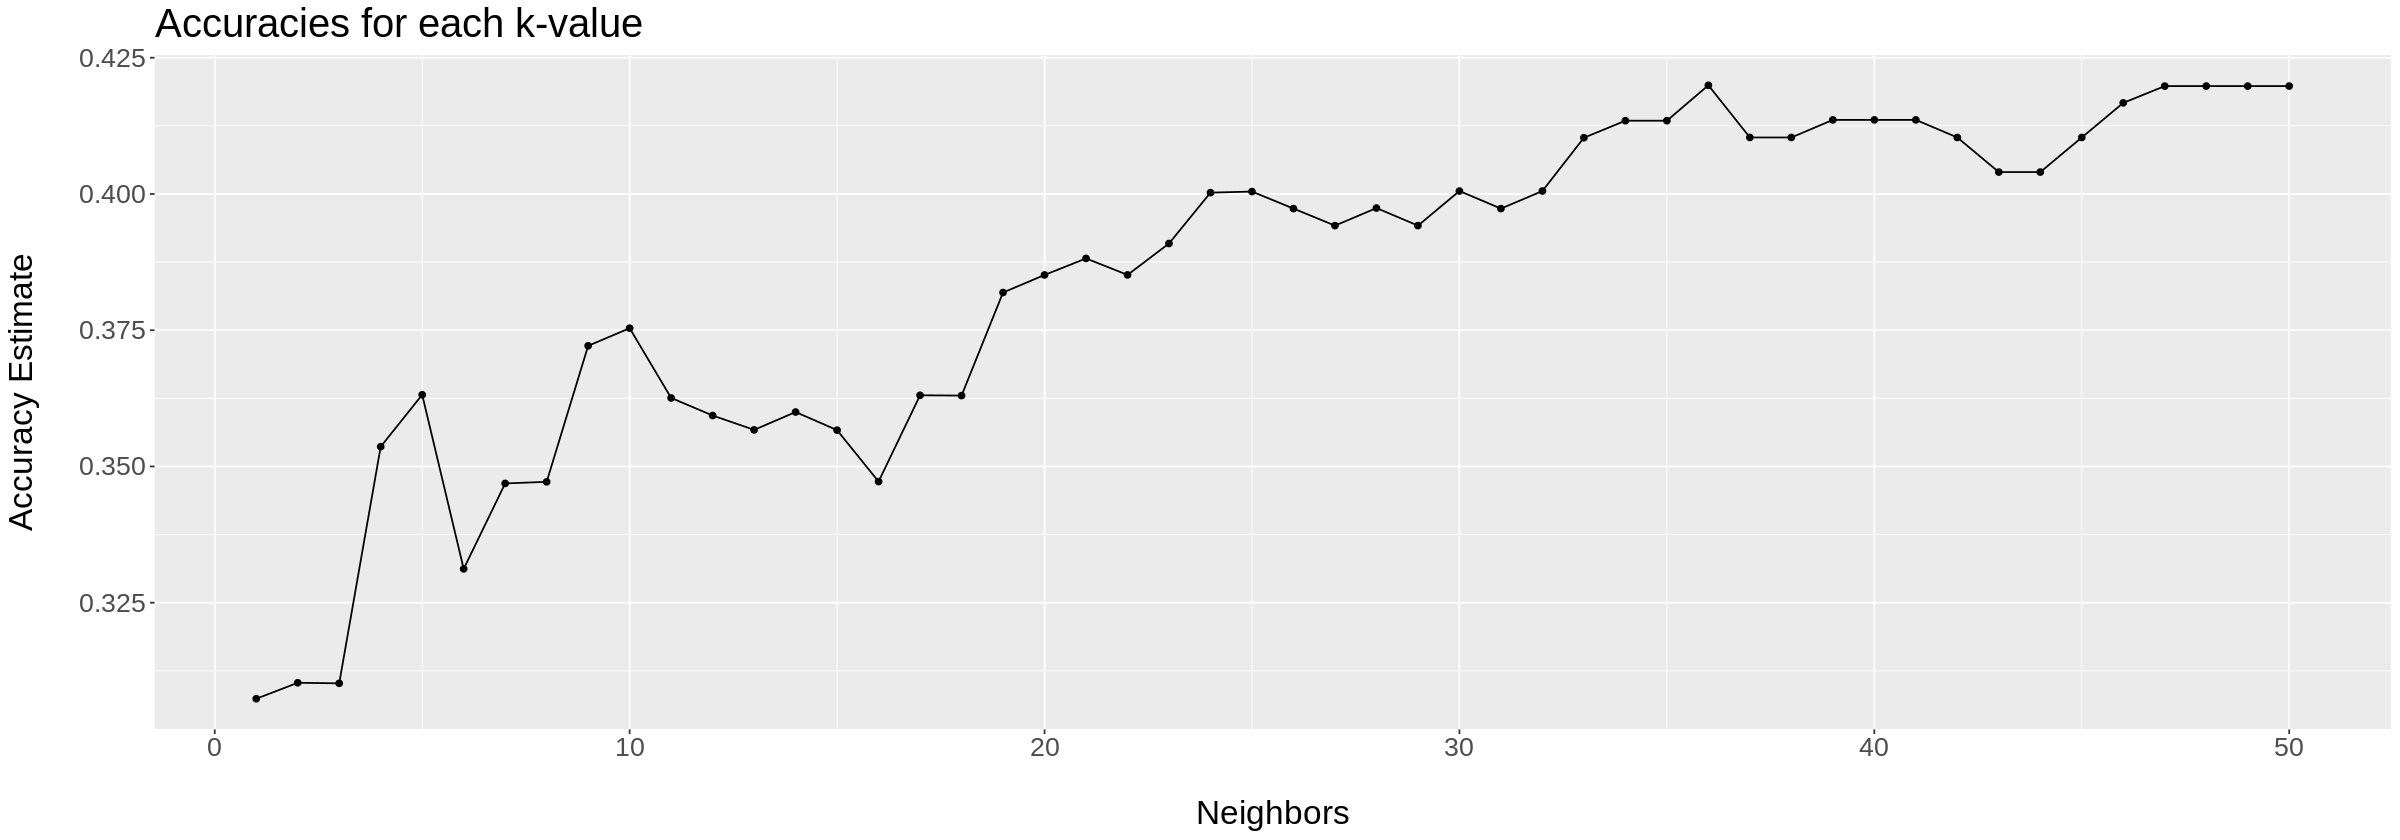

In [9]:
options(repr.plot.width = 20, repr.plot.height = 7)

accuracy_plot <- alcohol_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    # geom_vline(xintercept = 36, colour = "blue") +
    # geom_point(aes(x = 36, y = ky), size = 4, colour = "red") +
    labs(x = "\nNeighbors",
         y = "Accuracy Estimate\n",
         title = "Accuracies for each k-value") +
    theme(text = element_text(size = 20))

accuracy_plot

Looking at the plot, it's difficult to distinguish the exact k-value with the highest accuracy, we need to create a table showing accuracies in descending order for each k-value.

In [10]:
top_k <- alcohol_results |>
         select(neighbors, mean) |>
         arrange(desc(mean))
top_k

neighbors,mean
<int>,<dbl>
36,0.4199415
47,0.4197927
48,0.4197927
49,0.4197927
⋮,⋮
2,0.3103067
3,0.3102059
1,0.3073772


Although the highest accuracy occurs when the number of neighbors is 36, looking at the plot above, the values around 36 slighly vary. However, when the number of neighbors is 48, the values around it are stable and have the same accuracy. As a result, **48** is the most optimal k-value.

In [14]:
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 48) |> 
    set_engine("kknn") |> 
    set_mode("classification")

alcohol_fit <- workflow() |>
  add_recipe(alcohol_recipe) |>
  add_model(knn_best_spec) |>
  fit(data = alcohol_train)

### Results

In [15]:
alcohol_predictions <- predict(alcohol_fit, alcohol_test) |> 
    bind_cols(alcohol_test)

alcohol_predictions

alcohol_acc <- alcohol_predictions |> 
    metrics(truth = Alcohol, estimate = .pred_class) |> 
    select(.metric, .estimate) |> 
    head(1)

alcohol_acc

.pred_class,Age,NScore,EScore,OScore,AScore,IScore,CScore,SS,Alcohol
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
CL5,0.49788,-0.46725,0.80523,-0.84732,-1.62090,-1.37983,-1.01450,0.40148,CL6
CL5,1.82213,1.37297,-0.15487,-0.17779,-1.92595,-0.71126,-1.51840,-0.21575,CL6
CL5,0.49788,0.04257,-1.50796,-0.71727,0.28783,0.19268,1.30612,-0.52593,CL6
CL5,0.49788,-0.24649,-0.57545,-0.17779,-0.01729,-0.21712,-1.51840,-0.21575,CL6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
CL5,-0.95197,-0.79151,0.32197,1.88511,-1.07533,-0.21712,-0.78155,0.40148,CL3
CL5,-0.95197,-0.79151,0.00332,2.44904,0.76096,0.88113,-1.51840,1.92173,CL5
CL5,2.59171,2.12700,-0.15487,2.44904,0.94156,-0.21712,-0.65253,0.07987,CL5


.metric,.estimate
<chr>,<dbl>
accuracy,0.4311927


The accuracy of our classifier turned out to be about 43% which is not very good. There are a number of reasons why our classifier could not reach 

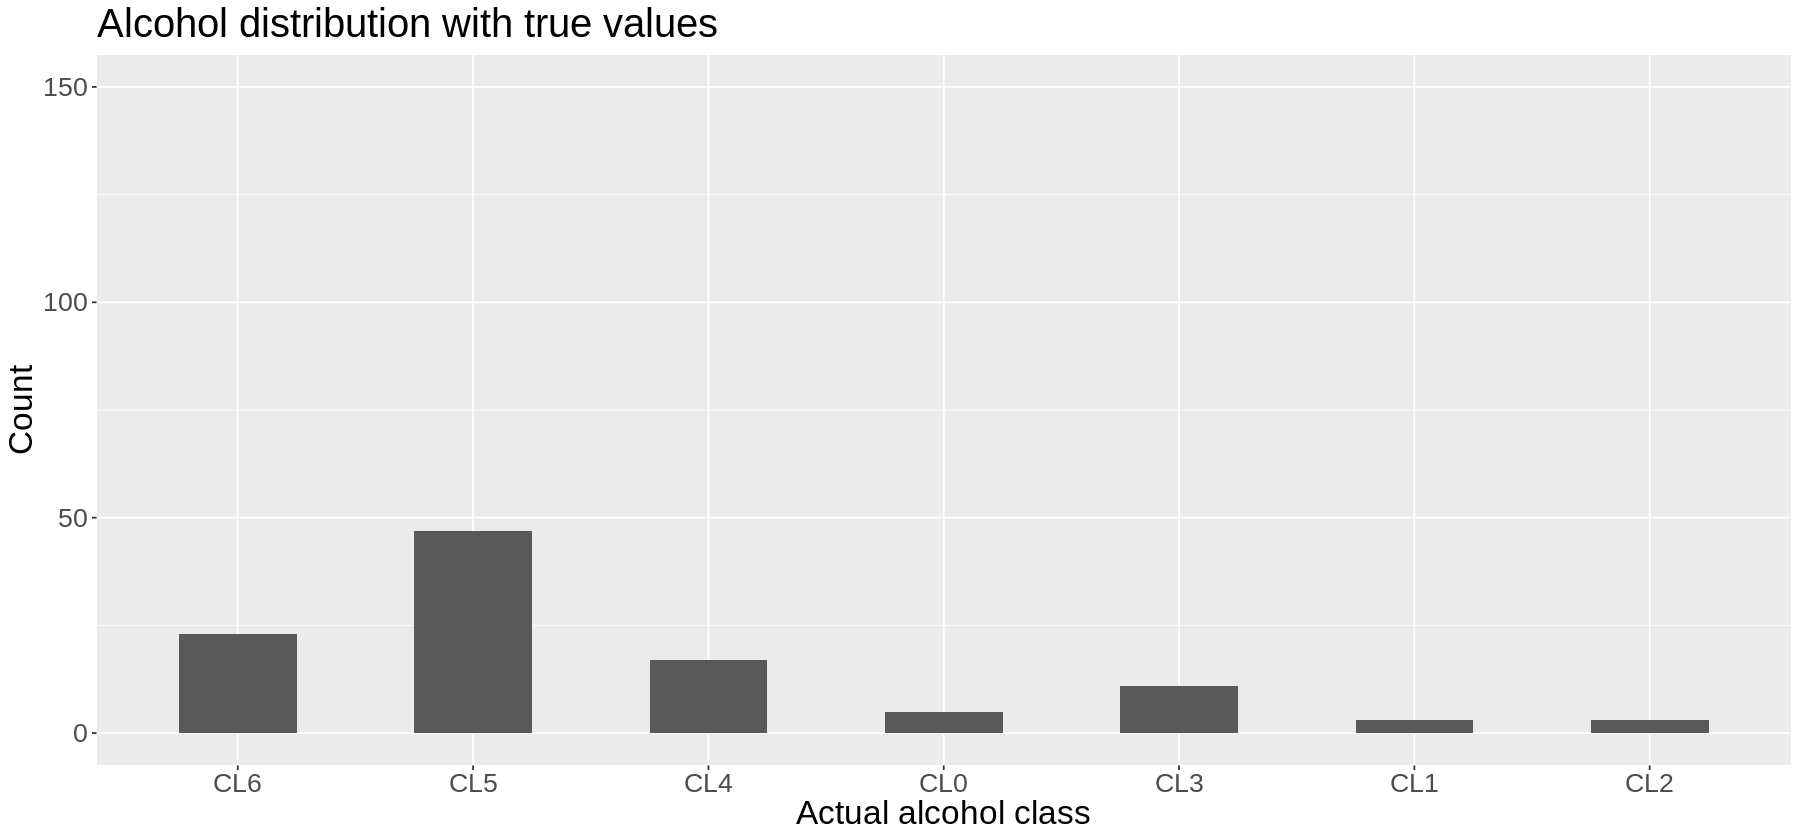

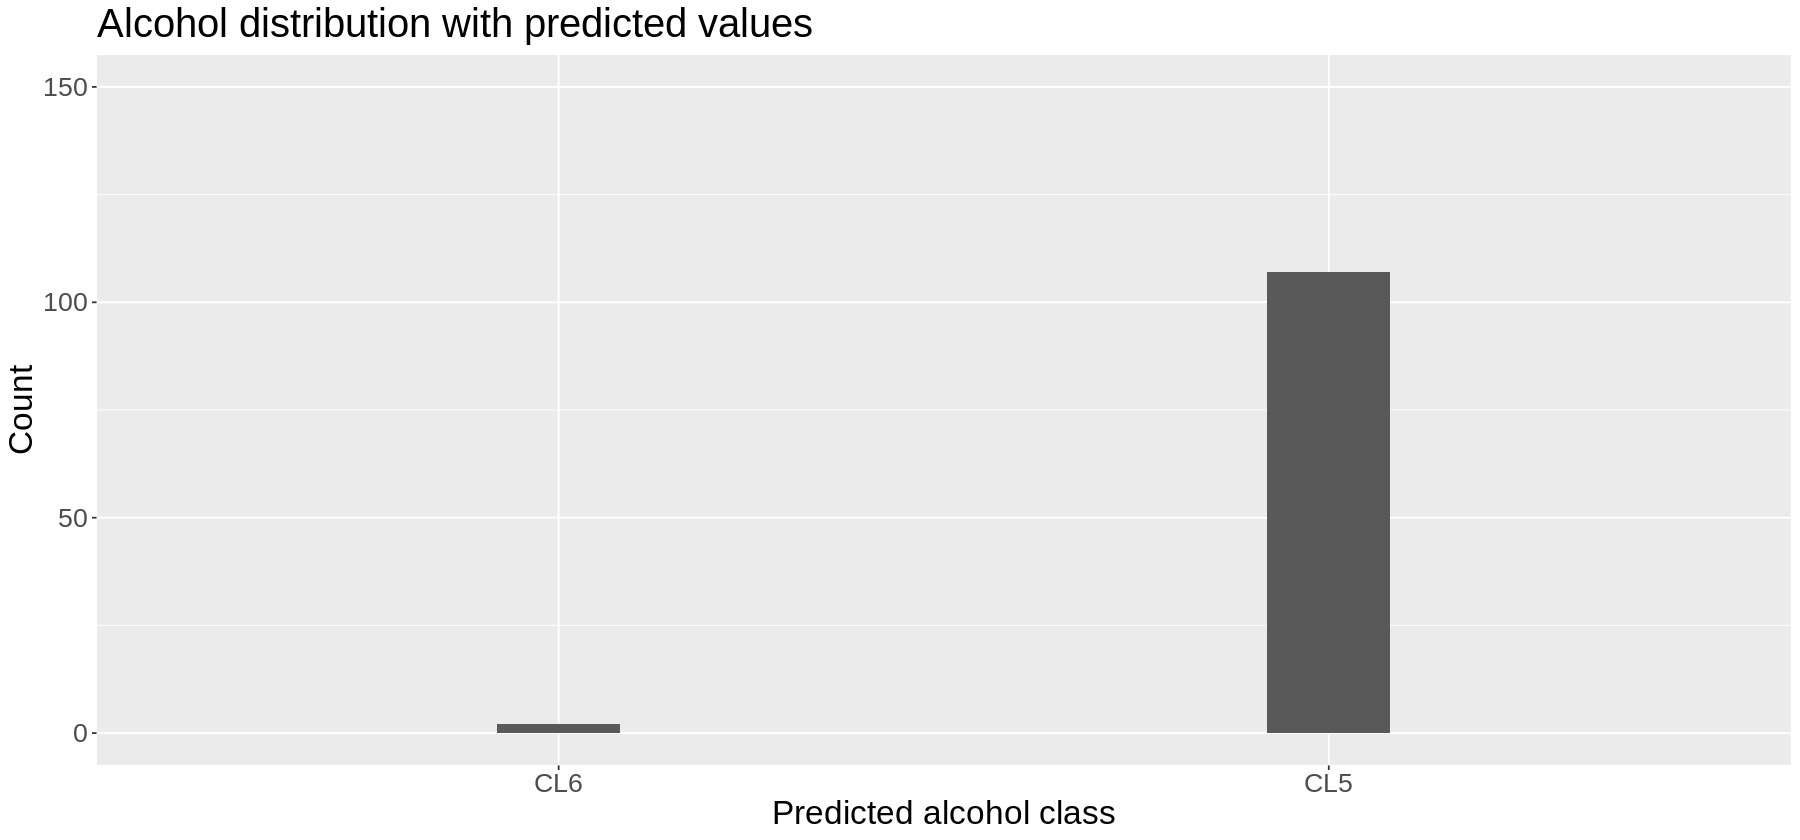

In [28]:
options(repr.plot.width = 15, repr.plot.height = 7)

# result_plot_actual <- ggplot(alcohol_predictions, aes(x = Alcohol)) +
#                         geom_bar(width = 0.5) +
#                         labs(x = "Actual alcohol class",
#                              y = "Count",
#                              title = "Alcohol distribution with true values") +
#                         ylim(0,150) +
#                         theme(text = element_text(size = 20))

# result_plot_pred <- ggplot(alcohol_predictions, aes(x = .pred_class)) +
#                         geom_bar(width = 0.16) +
#                         labs(x = "Predicted alcohol class",
#                              y = "Count",
#                              title = "Alcohol distribution with predicted values") +
#                         ylim(0,150) +
#                         theme(text = element_text(size = 20))

# result_plot_actual
# result_plot_pred